## Looking at 10% &CsPbIBrCl with the StellarSpec UVVis Spectrometer


In [1]:
#### In-situ measurement duing the  280˚C anneal + LED exposure (0.25 suns irradiance)

## Import and file structure

In [1]:
import frgtools.misc as frgm
import frgtools.plotting
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot') or plt.style.use('ggplot')
import pandas as pd
import os
import seaborn as sns
from scipy.optimize import curve_fit
from tqdm import tqdm
import matplotlib as mpl
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
from matplotlib import style
mpl.rcParams.update(mpl.rcParamsDefault)
from scipy.signal import chirp, find_peaks, peak_widths


import matplotlib.colorbar
from mpl_toolkits.axes_grid1 import make_axes_locatable
# divider = make_axes_locatable(ax_)

In [2]:
def load_novaspec(path):#, incident_wl):
    fids = [os.path.join(path, x) for x in os.listdir(path)]
    episode = []
    for f in fids:
        episode.append(float(f.split('-')[-1].split('Ep')[0]))
    t = np.array(episode)
    t.sort()
    temp = np.loadtxt(fids[0], skiprows=2)
    wl = temp[:,0]
#     counts = temp[:,1]
    cts = np.zeros((len(t), len(wl)))
    for f, t_, in tqdm(zip(fids, t), total = len(fids), desc = 'Loading Time Series', leave = False):
        n = np.where(t == t_)
        cts[n] = np.loadtxt(f, skiprows =2)[:,1]    
        
    results = {
        'wl': wl,
        'time': t,
        'counts': cts#-bg_smooth
    }
    return results

In [3]:
rootdir = os.path.join('/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/PL_Spectroscopy/20210804_T23') #replace this with the filepath to root directory for the experiment
bg = os.path.join(rootdir, 'bg')
raw = os.path.join(rootdir, 'raw')
extra = os.path.join(rootdir, 'extra')
tseries = os.path.join(rootdir, 'tseries')

### background fitting/smoothing

In [6]:
# fids = []
# for f in frgm.listdir(tseries, display = False):
#     if 'control' in f and '_rgb' not in f:
#         continue
#     fids.append(f)
# fids

In [7]:
# df_bg=pd.DataFrame(index=['wl', 'time', 'counts'], columns=[f.split('/')[8] for f in fids])
# n=0

# for column in df_bg:
#     data = load_novaspec(fids[n])
#     tempdf=pd.DataFrame(data.items(), index=['wl', 'time', 'counts'])
#     df_bg[column] = tempdf[1]
#     n=n+1
# df_bg = df_bg.transpose()

# df_bg['name'] = ''
# n= 0
# for n in range(0, df_bg.shape[0]):
#     df_bg['name'][fids[n].split('/')[8]] = fids[n].split('/')[8]

In [8]:
# df_bg

In [10]:
# from functools import partial #https://docs.python.org/2/library/functools.html
# from scipy.signal import savgol_filter

# def average_counts(x):
#     return np.mean(x, axis=0)

# window = 1
# order = 0

In [11]:
# df_bg['tseries_avg'] = df_bg['counts'].apply(average_counts)
# df_bg['tseries_avg_smooth'] = df_bg['tseries_avg'].apply(
#     partial(savgol_filter, window_length = window, polyorder = order)
# )

In [12]:
# df_bg

In [13]:
# plt.plot(df_bg['wl']['SNPVD_CRACK_BACK'], df_bg['counts']['SNPVD_CRACK_BACK'][2], label='SNPVD_CRACK_BACK')
# plt.xlabel('Wavelength nm')
# plt.ylabel('Counts a.u.')
# plt.legend()
# plt.show()

## Waterfall plots

In [19]:
fids = []
for f in frgm.listdir(tseries, display = False):
    if 'control' in f and '_rgb' not in f:
        continue
    fids.append(f)
fids

['/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/PL_Spectroscopy/20210804_T23/tseries/C2_sunny',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/PL_Spectroscopy/20210804_T23/tseries/C1_sunny',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/PL_Spectroscopy/20210804_T23/tseries/C1_dark',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/PL_Spectroscopy/20210804_T23/tseries/B2_dark',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/PL_Spectroscopy/20210804_T23/tseries/B2 _sunny',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/PL_Spectroscopy/20210804_T23/tseries/B1_sunny',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/PL_Spectroscopy/20210804_T23/tseries/B1_dark',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/PL_Spectroscopy/20210804_T23/tseries/A2_sunny',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/PL_Spectroscopy/20210804_T23/tseries/A2_dark',
 '/Volumes/GoogleDrive/My Drive/Characterization_RAWDATA/P

In [16]:
fids[0].split('/')[8]

'C2_sunny'

In [17]:
df=pd.DataFrame(index=['wl', 'time', 'counts'], columns=[f.split('/')[8] for f in fids])
n=0
for column in df:
    data = load_novaspec(fids[n])
    tempdf=pd.DataFrame(data.items(), index=['wl', 'time', 'counts'])
    df[column] = tempdf[1]
    n=n+1
df = df.transpose()


df['name'] = ''
n= 0
for n in range(0, df.shape[0]):
    df['name'][fids[n].split('/')[8]] = fids[n].split('/')[8]

In [30]:
# df = df.transpose()
df

,wl,time,counts,name
C2_sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-152.25, -99.799, -54.999, 37.676, 53.586, 3...",C2_sunny
C1_sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-80.837, -6.097, -9.1345, -3.448, -12.187, -...",C1_sunny
C1_dark,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-102.17, -5.7628, 1.5086, -7.1445, 2.2361, 6...",C1_dark
B2_dark,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-107.65, -3.8016, 12.324, 43.166, 69.462, -2...",B2_dark
B2 _sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-123.97, -41.395, -12.008, 11.352, 94.696, 4...",B2 _sunny
B1_sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-10.989, 8.0193, -8.1591, 27.138, 58.988, 67...",B1_sunny
B1_dark,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-65.837, 32.31, 87.853, 113.87, 204.78, 179....",B1_dark
A2_sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[79.046, 171.46, 197.42, 234.74, 277.57, 285....",A2_sunny
A2_dark,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[264.84, 264.54, 321.71, 380.5, 439.15, 377.3...",A2_dark
A1_sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[275.05, 327.31, 346.46, 349.99, 449.42, 445....",A1_sunny


In [ ]:
# # Filtering out bugged curves (manual entry)
# # df = df[df.name != 'CsPbSnF3_25_5isl']

# # plotting a subset of experiment

# Filter_1 = 'BACK'
# Filter_2 = ''
# Filter_3 = ''

# df_filter1 = df[df.name.str.contains(Filter_1)]
# df_filter2 = df_filter1[df_filter1.name.str.contains(Filter_2)]
# df_filter3 = df_filter2[df_filter2.name.str.contains(Filter_3)]
# df_filter3.reset_index(drop=True, inplace=True)

# # list scans in your filtered dataset before plotting
# for n in df_filter3['name'].unique(): print(n)

In [32]:
# plt.plot(df['wl']['GLASS_FRONT'], df['counts']['GLASS_FRONT'][2], label='GLASS_FRONT', color= 'red', linestyle='-')
# plt.plot(df['wl']['GLASS_BACK'], df['counts']['GLASS_BACK'][2], label='GLASS_BACK', color= 'red', linestyle='--')
# plt.xlabel('Wavelength nm')
# plt.ylabel('Counts a.u.')
# plt.legend()
# plt.xlim(625,725)
# plt.ylim(0,10000)
# plt.show()

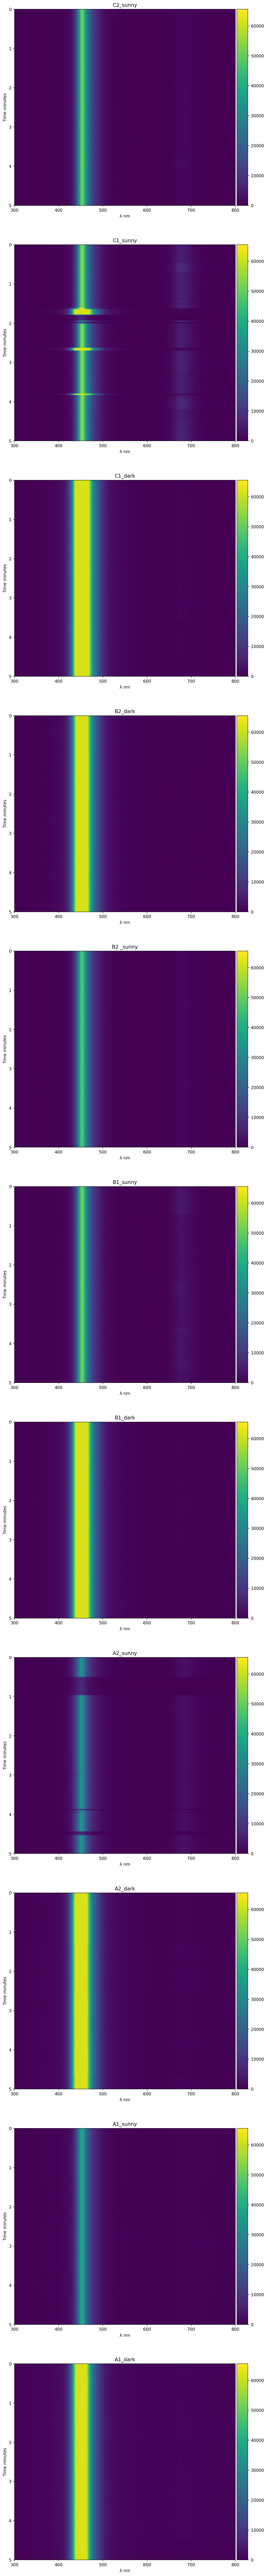

In [33]:
embiggen = 10
horiz = 1
vert = df.shape[0]
from matplotlib.colors import LogNorm

# cm1 = 'inferno'
# cm2 = 'Greys'
fig, ax = plt.subplots(vert, horiz, figsize = (horiz*embiggen, vert*embiggen))

# for n, ax_ in zip(range(0, len(list_of_files)), ax.ravel()):
for n, ax_ in zip(range(0, df.shape[0]), ax.ravel()):
    im= ax_.imshow(df['counts'][fids[n].split('/')[8]], extent=[df['wl'][fids[n].split('/')[8]][0], 
                                                                df['wl'][fids[n].split('/')[8]][-1],
                                                                5,0], aspect = 'auto')
#                                                                 df['time'][fids[n].split('/')[8]][0]*2,
#                                                                 df['time'][fids[n].split('/')[8]][-1]*2])#, norm=LogNorm( vmax=5000))

    ax_.set_ylabel('Time minutes')
    ax_.set_xlabel('λ nm')
    ax_.set_title(fids[n].split('/')[8])
#     ax_.set_yticklabels([])
#     ax_.set_xticklabels([])

#     ax_.set_xticklabels([5000, 4000, 3000, 2000, 450])
#     ax_.invert_yaxis()
    divider = make_axes_locatable(ax_)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(im, cax=cax)
    cbar.mappable.set_clim(0, 2**16)
    ax_.set_xlim(300,800)
# try plotting color in log scale 

plt.show()

## Looking at averaged counts

In [34]:
from functools import partial #https://docs.python.org/2/library/functools.html
from scipy.signal import savgol_filter

def average_counts(x):
    return np.mean(x, axis=0)

window = 21
order = 3

In [35]:
df['tseries_avg'] = df['counts'].apply(average_counts)
df['tseries_avg_smooth'] = df['tseries_avg'].apply(
    partial(savgol_filter, window_length = window, polyorder = order)
)

In [43]:
name_key = {
    'A1': '9% Excess PbI2',
    'A2': '9% Excess PbI2',
    'B1': '12% Excess PbI2',
    'B2': '12% Excess PbI2',
    'C1': '15% Excess PbI2',
    'C2': '15% Excess PbI2',
    'B2 ': '12% Excess PbI2',

    'sunny': 'Sunny-Side',
    'dark': 'Dark-Side',
    'FWD': 'Forward',
    'rev': 'Reverse',
    'fwd': 'Forward'
    

}

def getname(n): #ETL
    letter = n.split('_')[0]
    return name_key[letter]

def getname_1(n): #HTL
    letter_2 = n.split('_')[1]
    return name_key[letter_2]

def getname_3(n): #HTL
    letter_3 = n.split('_')[1]
    return name_key[letter_3]

df['Excess_PbI2'] = ''
df['Side'] = ''
# df['dir'] = ''
# df['condition'] = ''



# for n in range(df.shape[0]):
#     df['dspacing'][n] = theta_to_d(df['angles'][n]
    
# df['ETL'] = df['name'].apply(getname)
df['Excess_PbI2'] = df['name'].apply(getname)
df['side'] = df['name'].apply(getname_3)

In [44]:
# Filtering out bugged curves (manual entry)
# df = df[df.name != 'CsPbSnF3_25_5isl']

# plotting a subset of experiment

Filter_1 = ''
Filter_2 = ''
Filter_3 = ''

df_filter1 = df[df.name.str.contains(Filter_1)]
df_filter2 = df_filter1[df_filter1.name.str.contains(Filter_2)]
df_filter3 = df_filter2[df_filter2.name.str.contains(Filter_3)]
df_filter3.reset_index(drop=True, inplace=True)

# list scans in your filtered dataset before plotting
count = 0
for n in df_filter3['name'].unique(): 
    print(n)
    count +=1
print(count)

C2_sunny
C1_sunny
C1_dark
B2_dark
B2 _sunny
B1_sunny
B1_dark
A2_sunny
A2_dark
A1_sunny
A1_dark
11


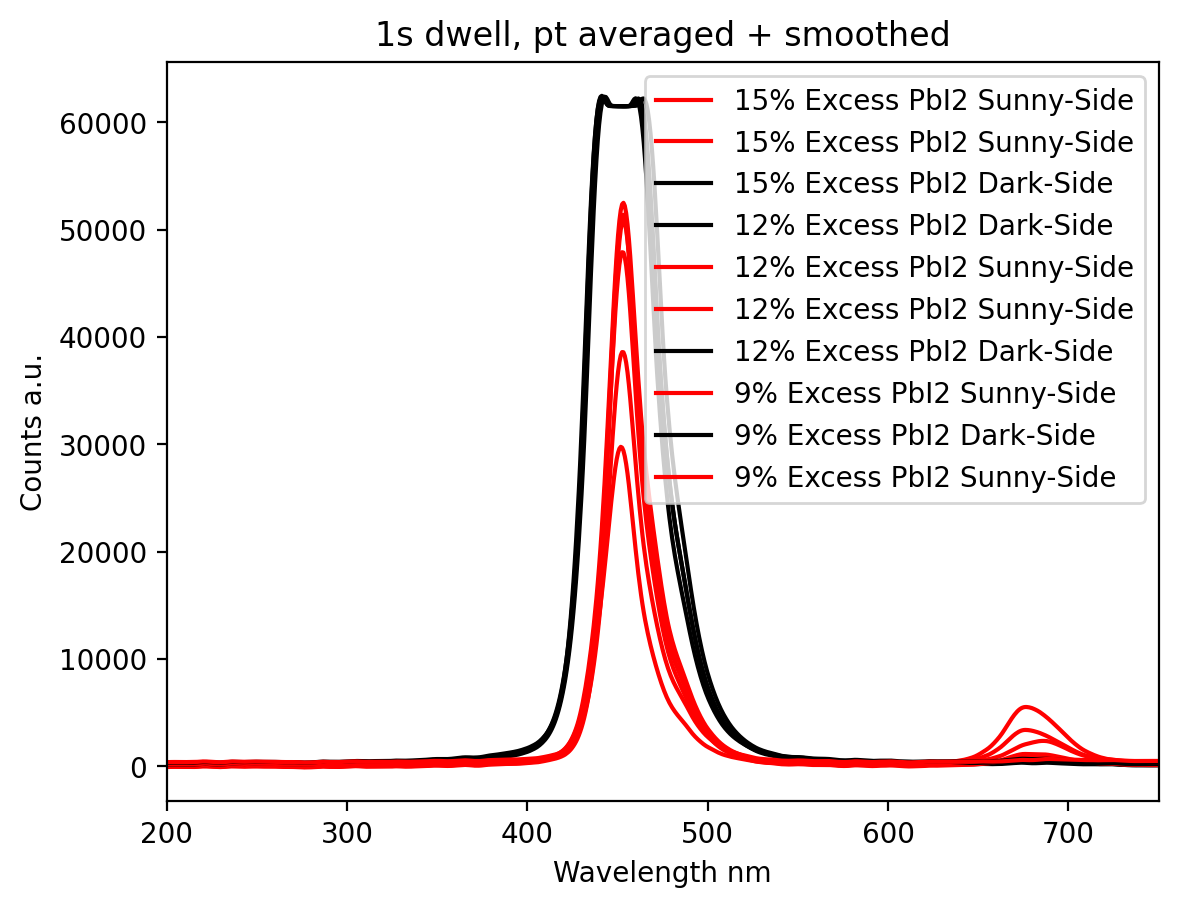

In [51]:
data = df_filter3

# color_choice = ['blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red', 'red', 'blue', 'red']#, 'black']#, 'red', 'red', 'blue', 'blue']
# line_choice = ['-', '--', '-', '--', '--', '-', '-', '--', '-', '--', '--']



for n in range(data.shape[0]-1):
    if data['side'][n] == 'Dark-Side':
        color_choice = 'black'
    if data['side'][n] == 'Sunny-Side':
        color_choice = 'red'
        
    plt.plot(data['wl'][n], 
             data['tseries_avg_smooth'][n],# - df_bg['tseries_avg_smooth']['BG_5s_dwell'],
             label=(str(data['Excess_PbI2'][n])+' '+str(data['side'][n])),
             color = color_choice,
#              linestyle= line_choice[n]            
            )

# plt.plot(df['wl']['NHTL'],df['tseries_avg_smooth']['NHTL'], label='NHTL')
# plt.plot(df['wl']['P3BT'],df['tseries_avg_smooth']['P3BT'], label='P3BT')
# plt.plot(df['wl']['P3HT'],df['tseries_avg_smooth']['P3HT'], label='P3HT')
# plt.plot(df['wl']['PTAA'],df['tseries_avg_smooth']['PTAA'], label='PTAA')

plt.legend()
plt.xlim(200, 750)
# plt.ylim(0,6000)
plt.xlabel('Wavelength nm')
plt.ylabel('Counts a.u.')
plt.title('1s dwell, pt averaged + smoothed')
plt.show()

## Binned Counts

In [15]:
df

,wl,time,counts,name,tseries_avg,tseries_avg_smooth
C2_sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-152.25, -99.799, -54.999, 37.676, 53.586, 3...",C2_sunny,"[-151.82918055555558, -84.24396319444448, -62....","[-132.33407928781818, -91.35180763845972, -60...."
C1_sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-80.837, -6.097, -9.1345, -3.448, -12.187, -...",C1_sunny,"[-122.98966423357666, -61.36632613138686, -42....","[-107.1295113263761, -67.38692053310206, -37.6..."
C1_dark,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-102.17, -5.7628, 1.5086, -7.1445, 2.2361, 6...",C1_dark,"[-118.17354032258062, -47.048752580645164, -24...","[-93.81210933610778, -56.352914046996474, -27...."
B2_dark,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-107.65, -3.8016, 12.324, 43.166, 69.462, -2...",B2_dark,"[-61.725931666666646, 6.880143666666668, 27.57...","[-39.90646929750508, -4.273100075697741, 23.07..."
B2 _sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-123.97, -41.395, -12.008, 11.352, 94.696, 4...",B2 _sunny,"[-84.71777748031496, -12.485621031496065, 5.72...","[-62.173593159641456, -23.66248735883272, 4.99..."
B1_sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-10.989, 8.0193, -8.1591, 27.138, 58.988, 67...",B1_sunny,"[-10.793899527559061, 57.41873212598426, 77.37...","[9.324127897402429, 47.62640441936383, 76.1840..."
B1_dark,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[-65.837, 32.31, 87.853, 113.87, 204.78, 179....",B1_dark,"[39.38407539130436, 102.11059243478265, 116.02...","[56.089931080442945, 92.1353861538478, 119.875..."
A2_sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[79.046, 171.46, 197.42, 234.74, 277.57, 285....",A2_sunny,"[115.43674666666668, 180.00404666666662, 199.5...","[130.72574351289316, 172.39369460493157, 203.5..."
A2_dark,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[264.84, 264.54, 321.71, 380.5, 439.15, 377.3...",A2_dark,"[215.81592372881357, 280.7421186440678, 298.88...","[239.24619136065377, 270.92438673289394, 295.2..."
A1_sunny,"[184.0, 184.75, 185.5, 186.25, 187.0, 187.75, ...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[275.05, 327.31, 346.46, 349.99, 449.42, 445....",A1_sunny,"[313.8218333333334, 381.63683333333336, 405.08...","[332.17153552606845, 374.8586060606064, 406.47..."


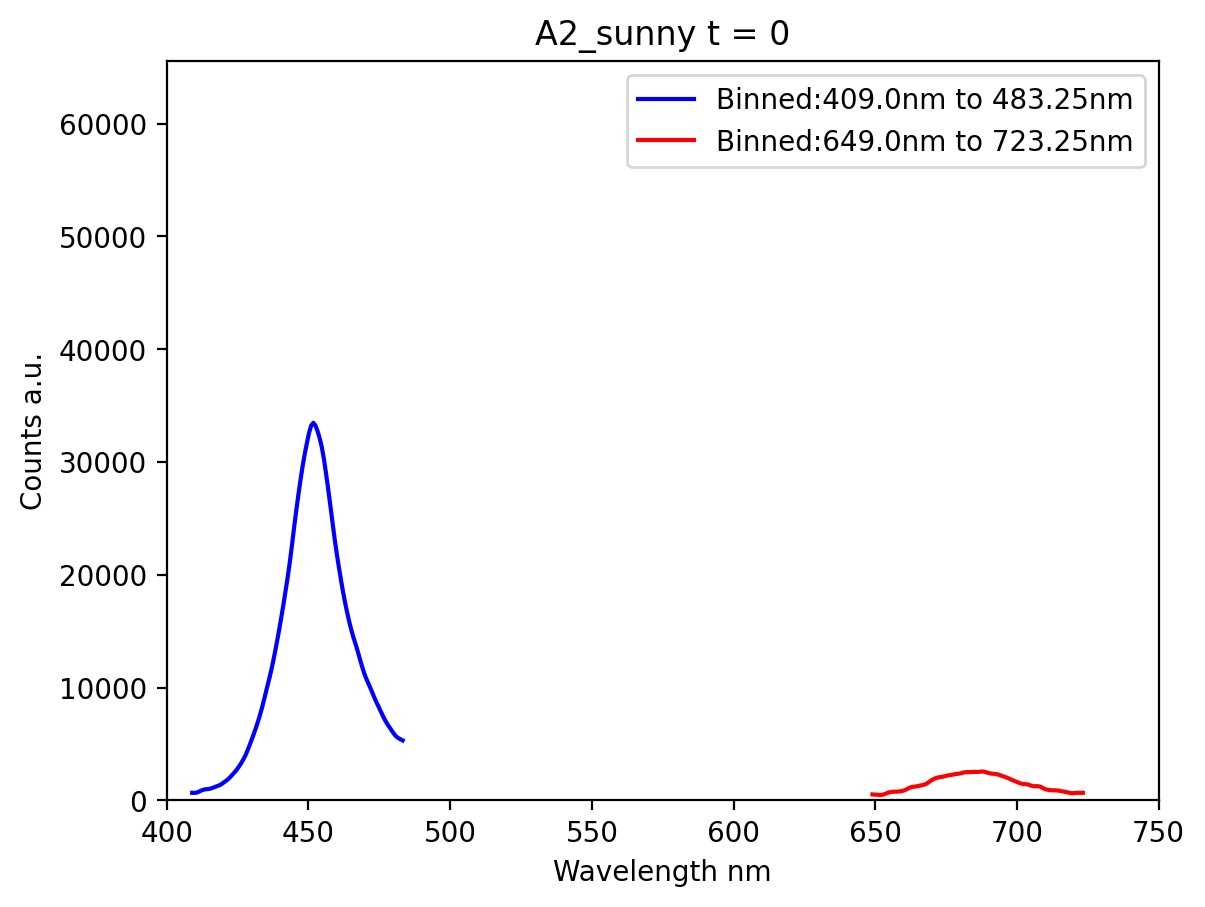

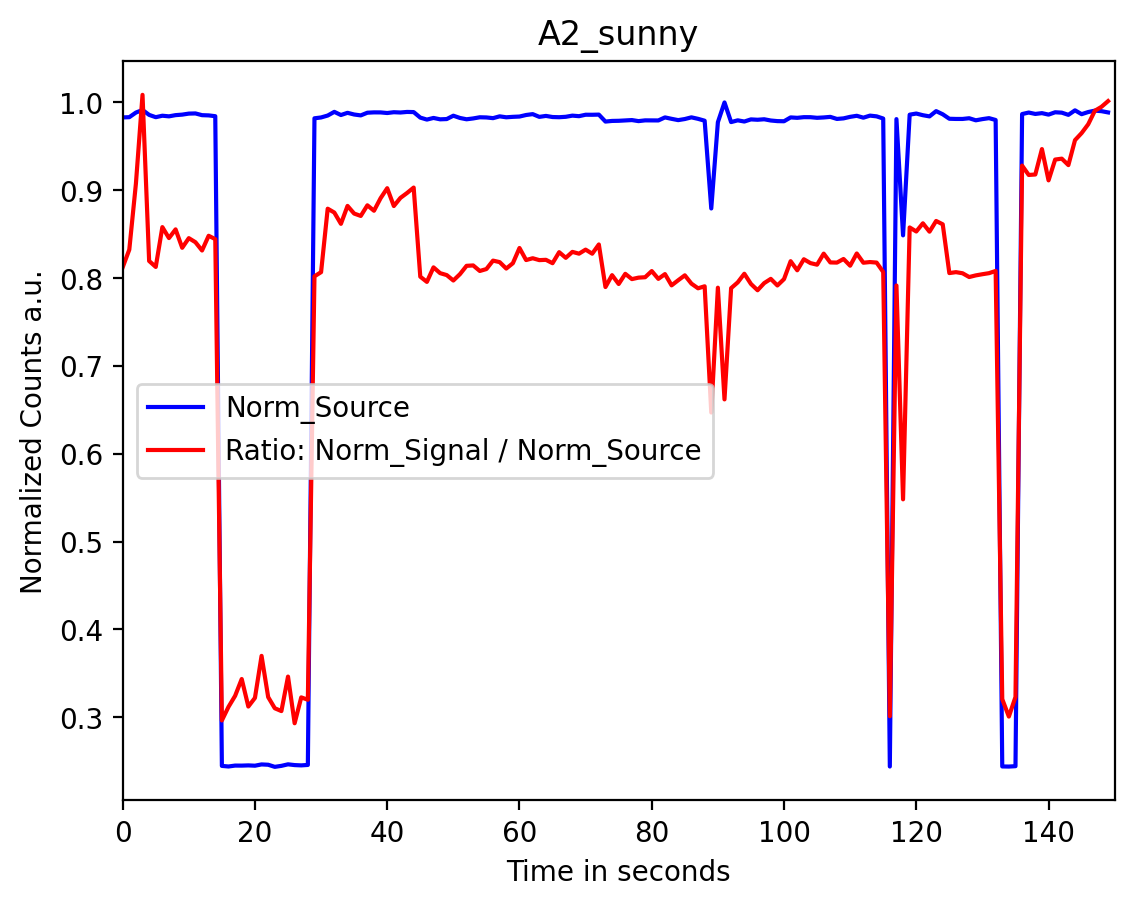

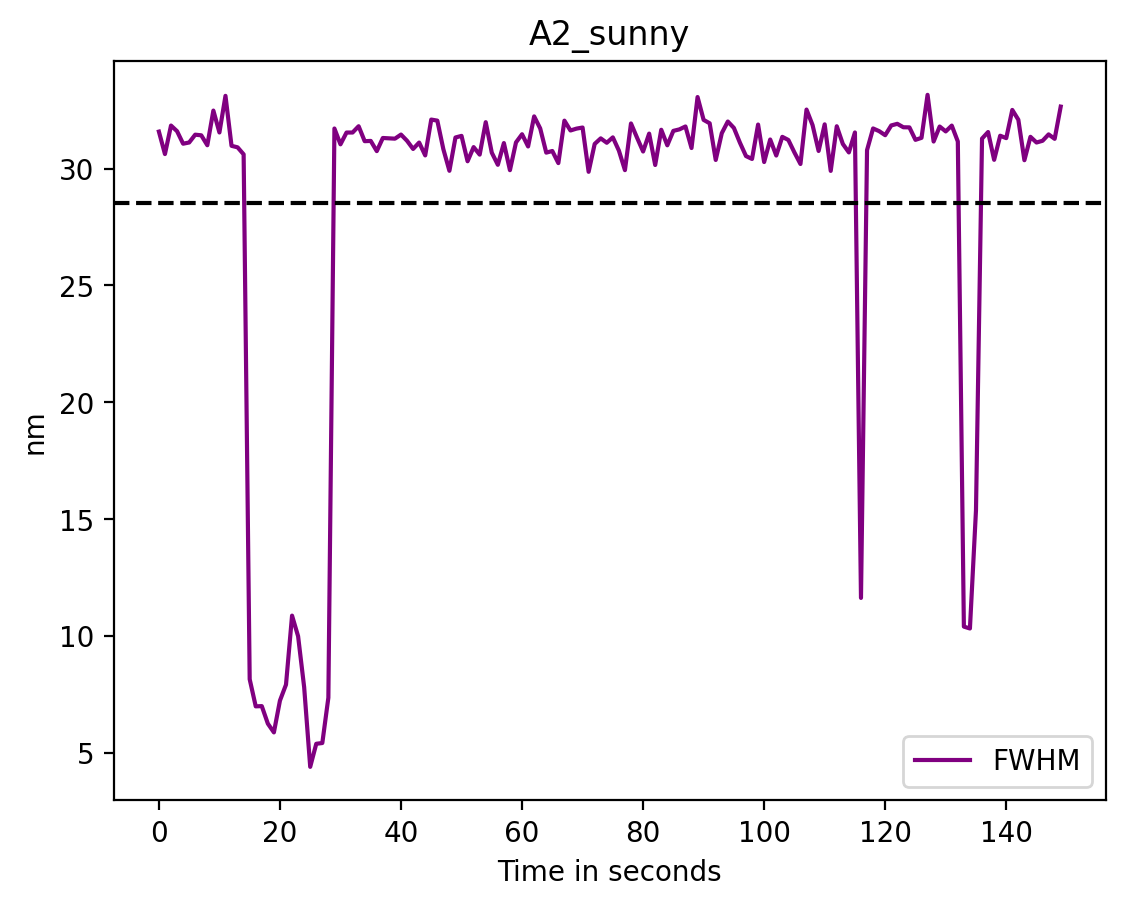

In [43]:
light_slice_1 = np.index_exp[300:400]
# light_slice_2 = np.index_exp[570:700]

signal_slice = np.index_exp[620:720]

sample = 'A2_sunny'

plt.plot(df['wl'][sample][light_slice_1], df['counts'][sample][0][light_slice_1], color = 'blue', label='Binned:'+str(np.min(df['wl'][sample][light_slice_1]))+'nm to '+str(np.max(df['wl'][sample][light_slice_1]))+'nm')
# plt.plot(df['wl'][sample][light_slice_2], df['counts'][sample][0][light_slice_2], color = 'blue', label='Binned:'+str(np.min(df['wl'][sample][light_slice_2]))+'nm to '+str(np.max(df['wl'][sample][light_slice_2]))+'nm')


plt.plot(df['wl'][sample][signal_slice], df['counts'][sample][0][signal_slice], color = 'red', label='Binned:'+str(np.min(df['wl'][sample][signal_slice]))+'nm to '+str(np.max(df['wl'][sample][signal_slice]))+'nm')
plt.xlabel('Wavelength nm')
plt.ylabel('Counts a.u.')
plt.ylim(0, 2**16)
plt.xlim(400, 750)
plt.title(sample+' t = 0')
plt.legend()
plt.show()

binlight_1 = np.sum(df['counts'][sample][:, int(str(light_slice_1).split('e(')[1].split(",")[0]):int(str(light_slice_1).split('e(')[1].split(",")[1][1:])], axis = 1)
binlight_2 = np.sum(df['counts'][sample][:, int(str(light_slice_2).split('e(')[1].split(",")[0]):int(str(light_slice_2).split('e(')[1].split(",")[1][1:])], axis = 1)

binlight = binlight_1 #+ binlight_2

binlight_norm = binlight/np.max(binlight)

# binlight_norm_avg = np.zeros(len(binlight_norm))
# for n in range( 0, len(binlight_norm)):
#     binlight_norm_avg[n] = np.sum(binlight_norm[0:n])/n

    
binsignal = np.sum(df['counts'][sample][:, int(str(signal_slice).split('e(')[1].split(",")[0]):int(str(signal_slice).split('e(')[1].split(",")[1][1:])], axis = 1) 

binsignal_norm = binsignal/np.max(binsignal)

# binsignal_norm_avg = np.zeros(len(binsignal_norm))
# for n in range( 0, len(binsignal_norm)):
#     binsignal_norm_avg[n] = np.sum(binsignal_norm[0:n])/n

plt.plot(df['time'][sample], binlight_norm, label = 'Norm_Source', color='blue' )

# plt.plot(df['time'][sample], binsignal_norm,  label = 'Signal Summed Count', color ='red')

plt.plot(df['time'][sample], binsignal_norm/binlight_norm,  label = 'Ratio: Norm_Signal / Norm_Source', color ='red')


plt.legend()
plt.xlabel('Time in seconds')
plt.ylabel('Normalized Counts a.u.')
# plt.ylim(.9,1.1)
plt.xlim(0,150)
plt.title(sample)

plt.show()

fwhm = np.zeros(df['counts'][sample].shape[0])
half_max = np.zeros(df['counts'][sample].shape[0])

for n in range (0, df['counts'][sample].shape[0]):
    x = df['counts'][sample][n][signal_slice]
    peaks, _ = find_peaks(x)
    results_half = peak_widths(x, peaks, rel_height=0.5)
    index_width = results_half[0][np.argmax(results_half[0])]
    half_max[n] = results_half[1][np.argmax(results_half[0])]
    left_index = results_half[2][np.argmax(results_half[0])]
    right_index = results_half[3][np.argmax(results_half[0])]
    fwhm[n] = (df['wl'][sample][1] - df['wl'][sample][0]) * index_width
    
plt.plot(df['time'][sample], fwhm,  label = 'FWHM', color ='purple')
plt.axhline(y=np.mean(fwhm), color='black', linestyle='--')

plt.legend()
plt.ylabel('nm')
plt.xlabel('Time in seconds')
plt.title(sample)
plt.show()

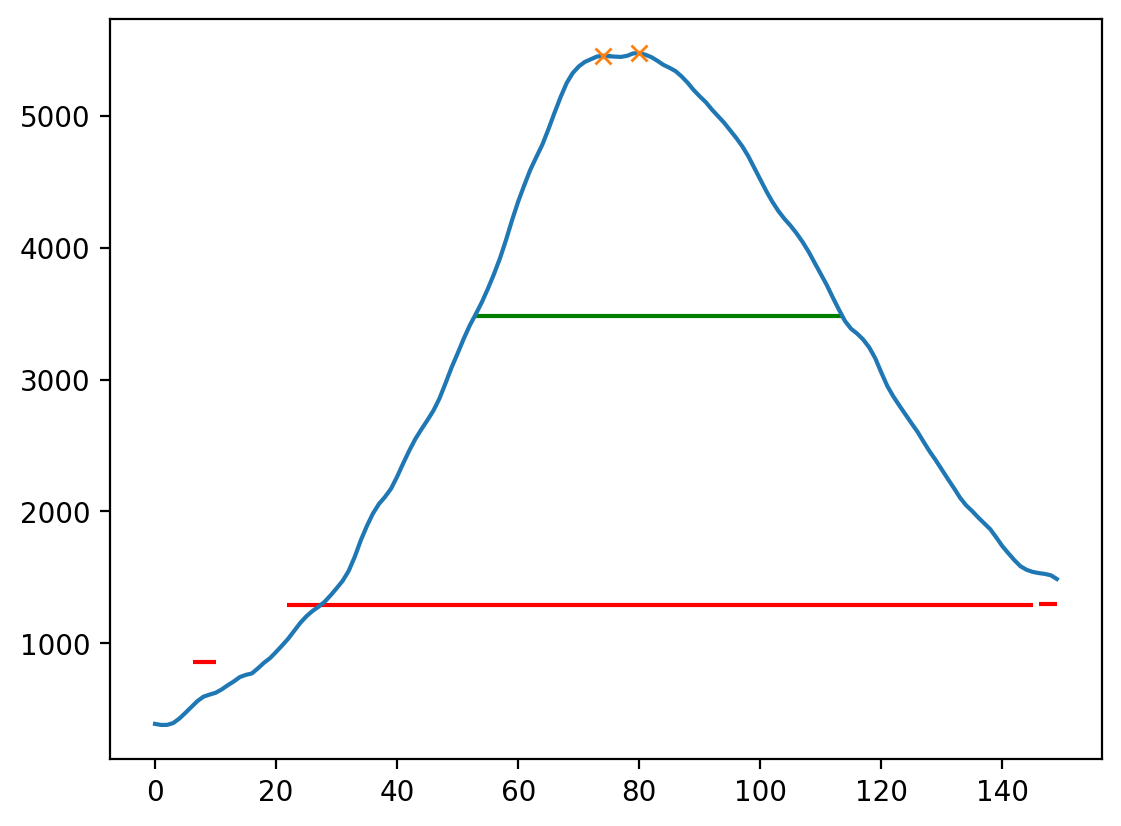

In [150]:
# verify FWHM worked
plt.plot(x)
plt.plot(peaks, x[peaks], "x")
plt.hlines(*results_half[1:], color="green") #FWHM
plt.hlines(*results_full[1:], color="red") #baseline
plt.show()

## Background analysis

In [157]:
df

,wl,time,counts,name
SNPVD_FRONT,"[184.0, 184.5, 185.0, 185.5, 186.0, 186.5, 187...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[2474.8, 2471.3, 2403.6, 2360.1, 2388.4, 2420...",SNPVD_FRONT
SNPVD_BACK,"[184.0, 184.5, 185.0, 185.5, 186.0, 186.5, 187...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[452.07, 450.32, 411.14, 400.52, 463.43, 492....",SNPVD_BACK
SNNP_FRONT,"[184.0, 184.5, 185.0, 185.5, 186.0, 186.5, 187...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[2690.4, 2668.3, 2551.3, 2482.7, 2516.2, 2593...",SNNP_FRONT
SNNP_BACK,"[184.0, 184.5, 185.0, 185.5, 186.0, 186.5, 187...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[369.74, 386.36, 400.51, 402.46, 440.61, 516....",SNNP_BACK
GLASS_FRONT,"[184.0, 184.5, 185.0, 185.5, 186.0, 186.5, 187...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[1248.8, 1280.9, 1205.0, 1169.4, 1232.8, 1295...",GLASS_FRONT
GLASS_BACK,"[184.0, 184.5, 185.0, 185.5, 186.0, 186.5, 187...","[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, ...","[[381.46, 403.64, 353.47, 357.74, 409.83, 436....",GLASS_BACK


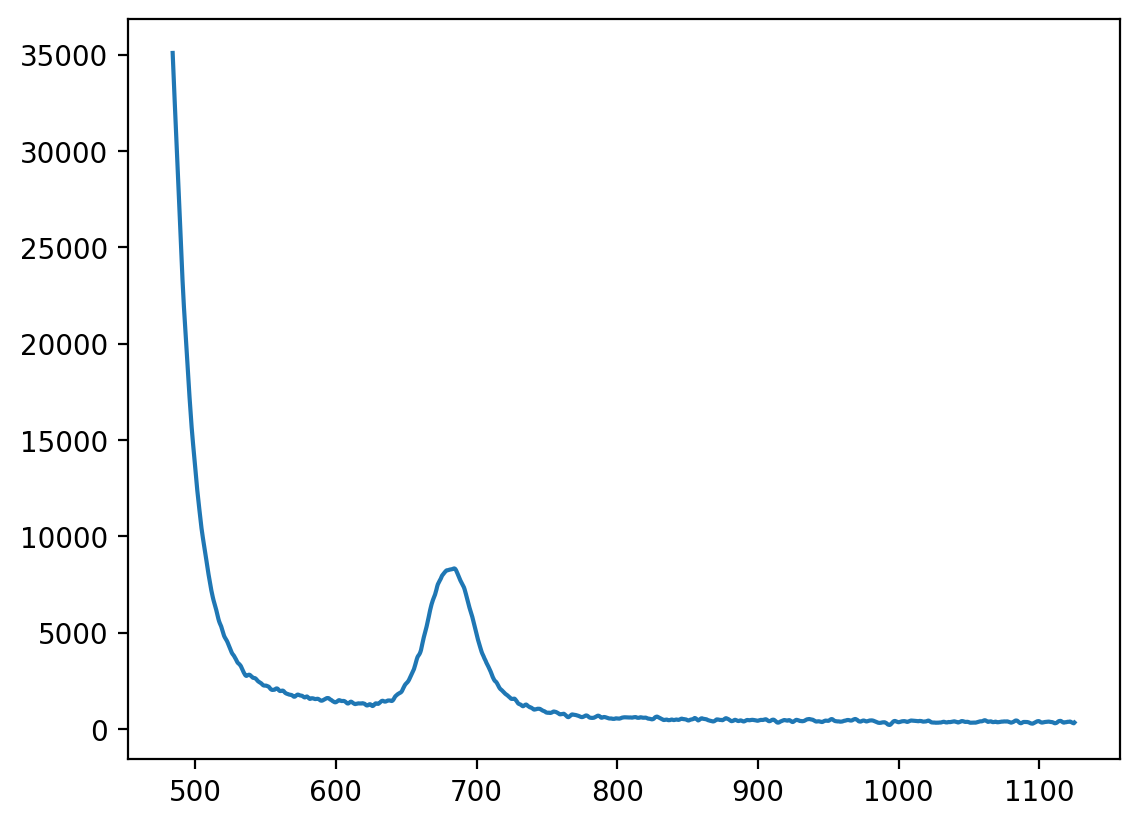

In [207]:
sample = 'GLASS_BACK'
decay_slice = np.index_exp[600:-1]
signal_slice = np.index_exp[:]


plt.plot(df['wl'][sample][decay_slice], df['counts'][sample][1][decay_slice])
plt.show()




In [208]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [209]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

In [210]:
xdata = df['wl'][sample][decay_slice]
ydata = df['counts'][sample][1][decay_slice]

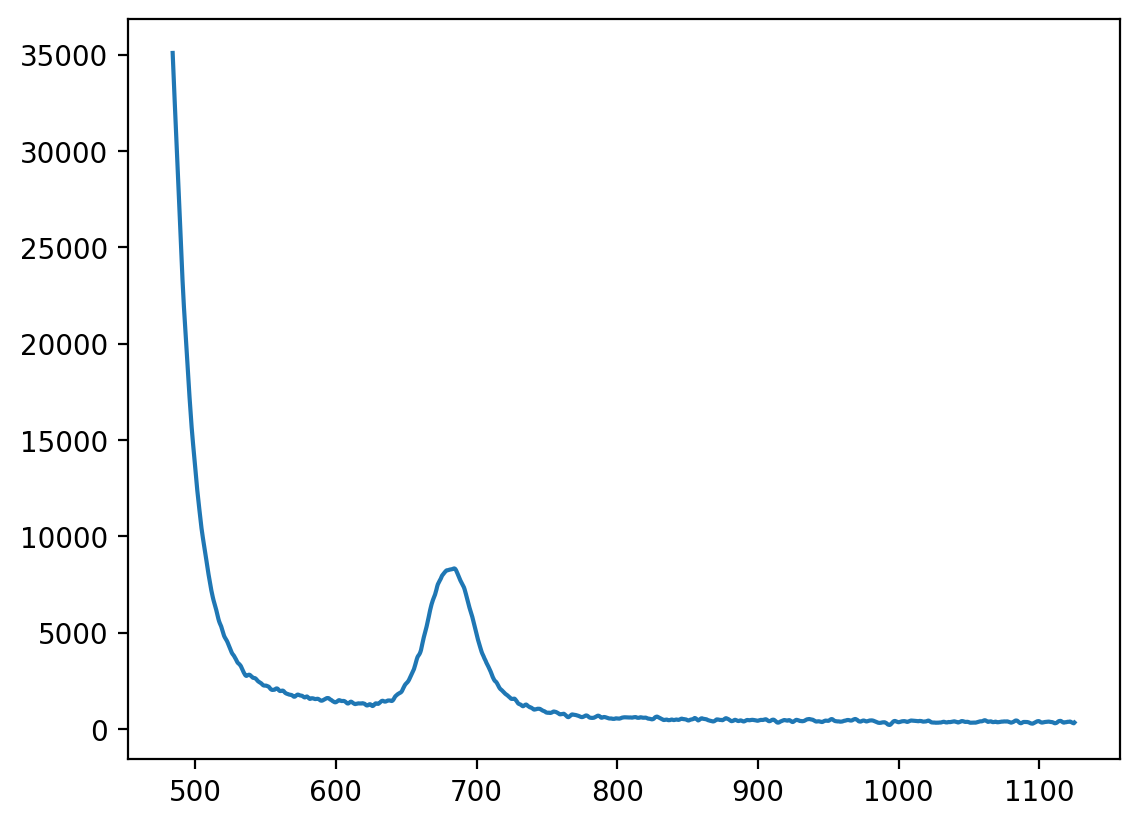

In [211]:
plt.plot(xdata, ydata)
plt.show()

[4.10445409e+17 6.22293955e-02 1.27710575e+03]
0.8415293934935765


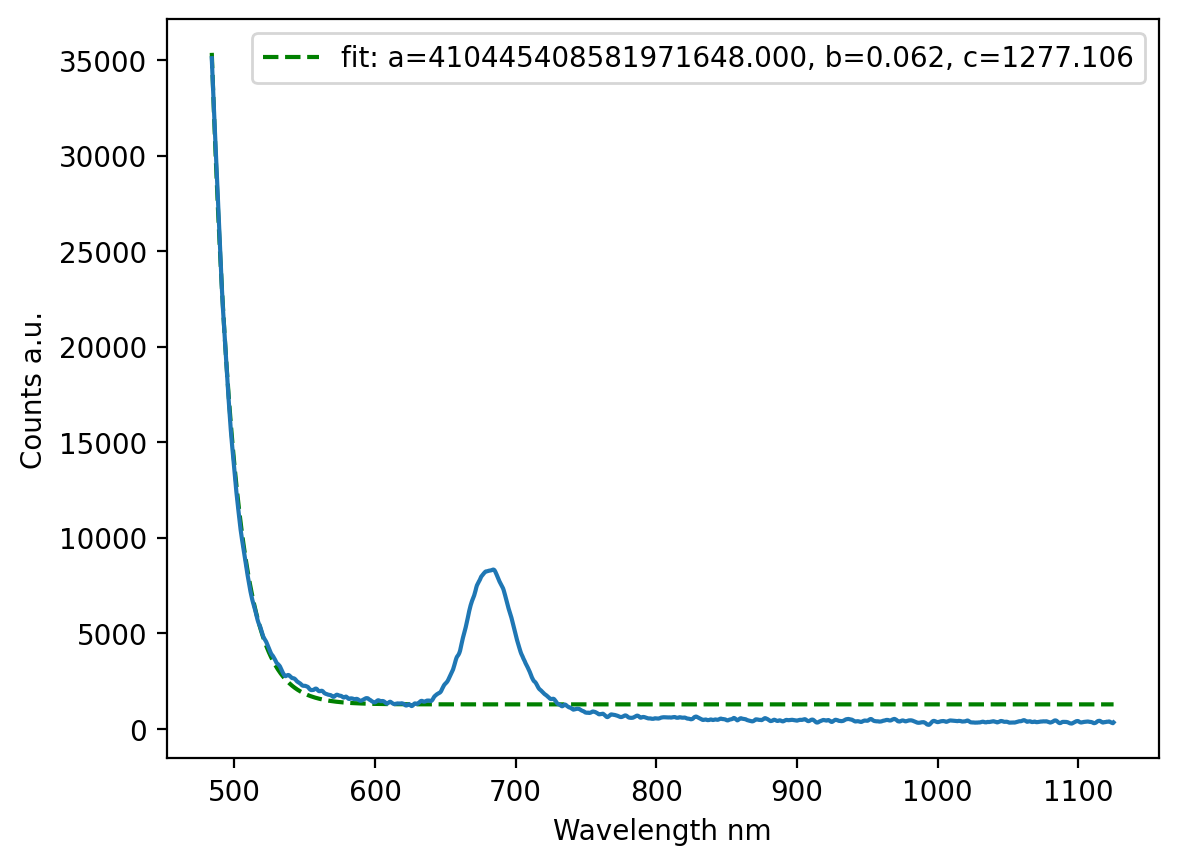

In [212]:
p0 = (2.33518246e+14,4.09891989e-02,1.00376804e+04)
# popt, pcov = curve_fit(func, xdata, ydata, p0, bounds=(7e-7, [6e9, 1, 3900]), absolute_sigma= True)#, method='lm')
popt, pcov = curve_fit(func, xdata, ydata, p0, method='lm', absolute_sigma= True)#, method='lm')

print(popt)

residuals = ydata- func(xdata, *popt)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((ydata-np.mean(ydata))**2)
r_squared = 1 - (ss_res / ss_tot)

print(r_squared)

plt.plot(xdata, func(xdata, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.plot(xdata, ydata)
plt.xlabel('Wavelength nm')
plt.ylabel('Counts a.u.')
plt.legend()
plt.show()
plt.show()

In [213]:
# cts_nbg , baseline = curveprocessing.remove_baseline(cts, sensitivity= 5)

In [214]:
new_ydata = popt[0]* np.exp(-popt[1]*df['wl'][sample][decay_slice]) + popt[2]

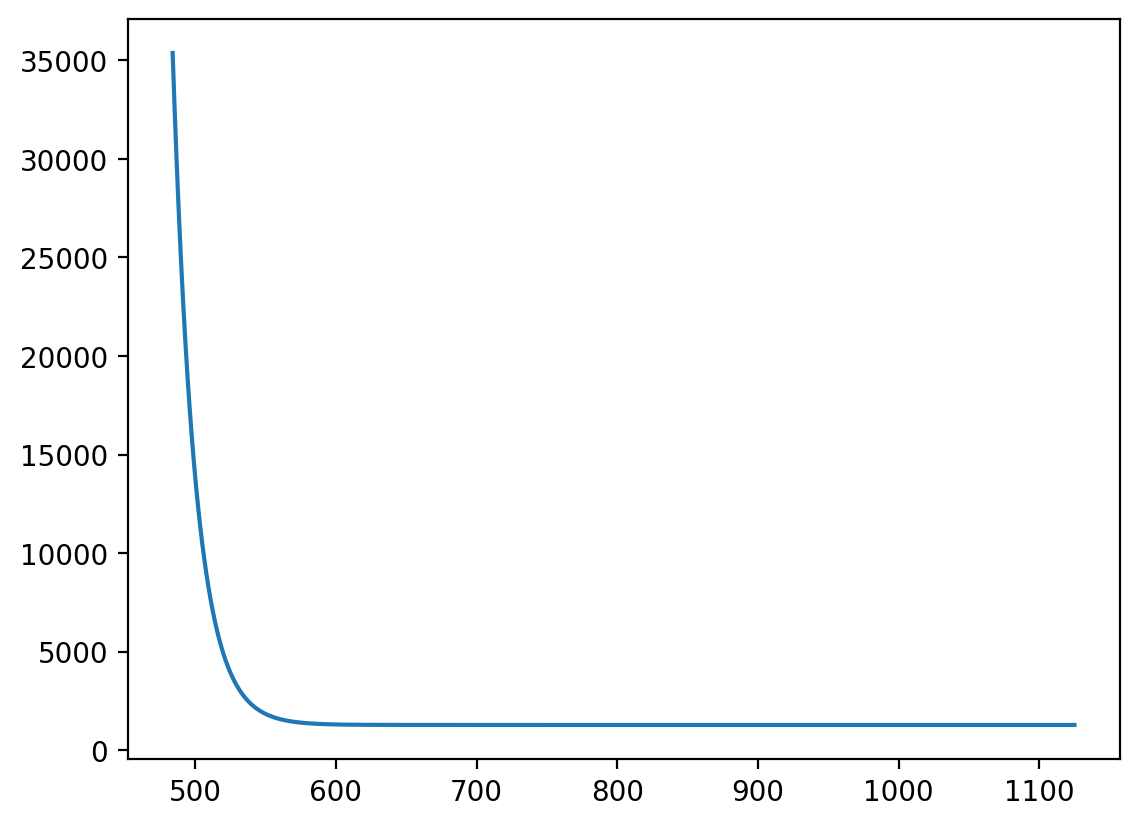

In [215]:

plt.plot(xdata, new_ydata)
plt.show()

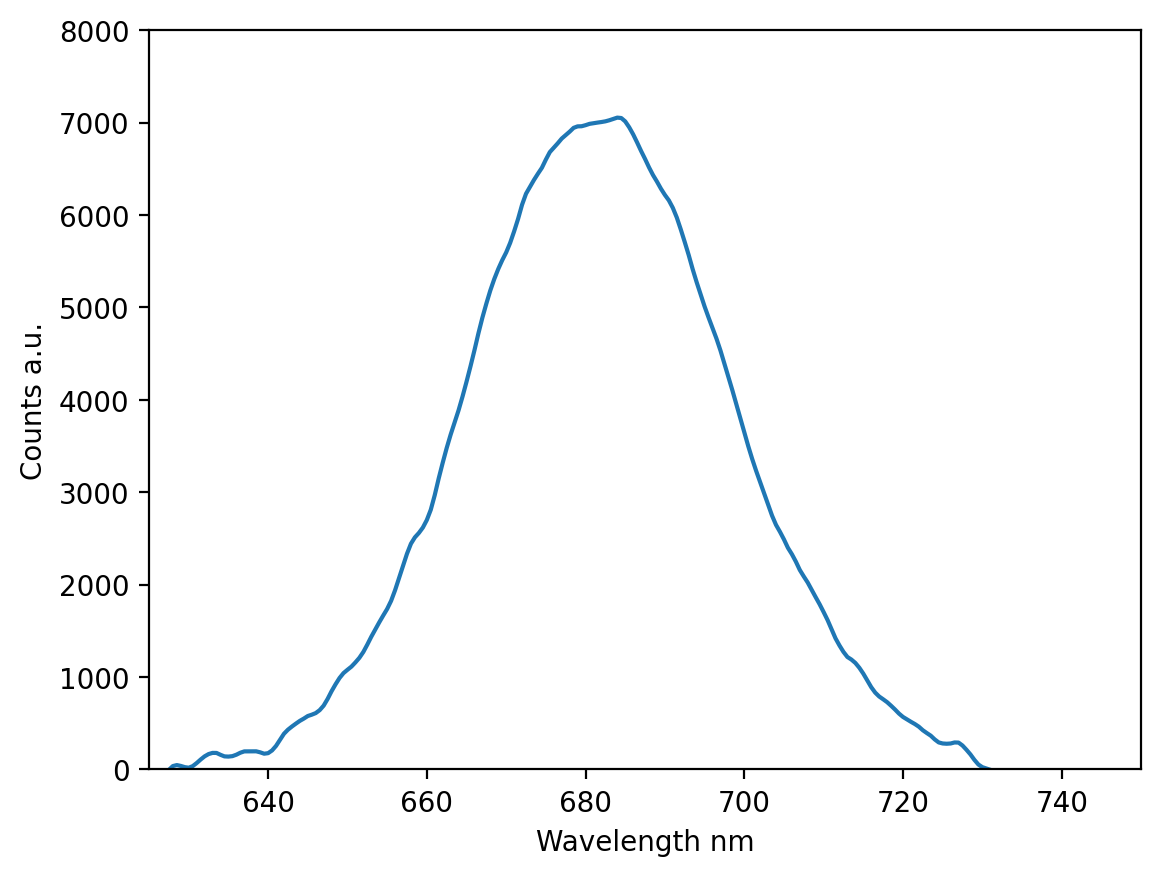

In [216]:
plt.plot(xdata, ydata-new_ydata)
plt.ylim(0,8000)
plt.xlim(625,750)

plt.xlabel('Wavelength nm')
plt.ylabel('Counts a.u.')
plt.show()


## Animation

In [219]:
df = df_bg

In [48]:
df['name']

GLASS_SUNNY                    GLASS_SUNNY
GLASS_DARK                      GLASS_DARK
GLASS_DARK_HALF_PWR    GLASS_DARK_HALF_PWR
GLASS_DARK_GROW            GLASS_DARK_GROW
GLASS_SUNNY_MOVING      GLASS_SUNNY_MOVING
Name: name, dtype: object

In [137]:
from matplotlib import animation, rc
from IPython.display import HTML, Image
rc('animation', html='html5')

fig = plt.figure()
ax1 = plt.axes()
line, = ax1.plot([], [], lw=2)

# color_choice = ['black', 'black', 'green', 'green', 'red', 'red', 'blue', 'blue']
plotlays, plotcols, plotlabel = [1], ['black'], ['GLASS_SUNNY']#, 'NHTL']

lines = []
for index in range(1):
    lobj = ax1.plot([],[],lw=2,color=plotcols[index], label = plotlabel[index])[0]
    lines.append(lobj)


def init():
    for line in lines:
        line.set_data([],[])
        line.set_label('d')
    return lines


ax1.set_xlim((300, 900))
ax1.set_ylim((0, 2**16))
ax1.set_ylabel('Counts a.u.')
ax1.set_xlabel('Wavelength nm')

time_text = ax1.text(0.82, 0.95, '', transform=ax1.transAxes)
legends = ax1.legend(  loc=[.71,.45])


def animate(i):
    i = i + 0 # starting video at an offset
    
    x1 = df['wl']['GLASS_DARK']
    y1 = df['counts']['GLASS_SUNNY'][i]
    
#     x2 = df['wl']['FTO_SNO2_PSK']
#     y2 = df['counts']['FTO_SNO2_PSK'][i]
    
#     x3 = df['wl']['Glass_PSK']
#     y3 = df['counts']['Glass_PSK'][i]
    
#     x4 = df['wl']['NHTL']
#     y4 = df['counts']['NHTL'][i]

   
        
        
    
    xlist = [x1]#, x2, x3]#, x4]#, x5, x6, x7, x8]
    ylist = [y1]#, y2, y3]#, y4]#, y5, y6, y7, y8]
    
    timelabel = i
    
    #for index in range(0,1):
    for lnum,line in enumerate(lines):
        line.set_data(xlist[lnum], ylist[lnum]) # set data for each line separately. 
    time_text.set_text('time = %.0f' % timelabel +'s') #to add a label per datapoint
    
#     ax.set_ylabel('Counts a.u.')
#     ax.set_xlabel('Wavelength nm')
    return lines

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=np.int(np.round(np.max(df['time']['GLASS_SUNNY'])*1,0)), #how many data points to show
                               interval=25, # setting the gif FPS in miliseconds
                               blit=True)
plt.close()

/Users/deniz/opt/anaconda3/envs/ds/lib/python3.7/site-packages/ipykernel_launcher.py:68: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


In [138]:
anim

In [139]:
anim.save('/Volumes/GoogleDrive/My Drive/Inorganic_PSK/PL_spec_analysis/Outputs/gifs/20210620_T19_GLASSSUNNY_PLQUENCH.gif', writer='Pillow', fps=10)

MovieWriter Pillow unavailable; using Pillow instead.


In [ ]:
25-((5/60)*20)-

In [17]:
25-((5/60)*20)-((60/60)*3)-((2/60)*20)-((2/60)*20)-((2/60)*20)

18.33333333333333

In [4]:
import math
class Test():
    def __init__(self,x,y):
        self.a = x
        self.b = y
        
    def func1(self):
        out1 = math.sqrt(self.a**2 + self.b**2)
        return out1

In [5]:
testing = Test(3,4)

In [6]:
testing.func1()

5.0